### Set up OpenAI API Key 

In [3]:
import os

OPENAI_API_TOKEN = ""  # Your OpenAI API token here
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

### Encode Image Sequence

In [4]:
import base64

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_paths = []
base64_images = []

image_paths.append("./images/407.jpg")
image_paths.append("./images/408.jpg")


# Getting the base64 string
for image in image_paths:
  base64_images.append(encode_image(image))

# print(len(base64_images))

2


### View image set

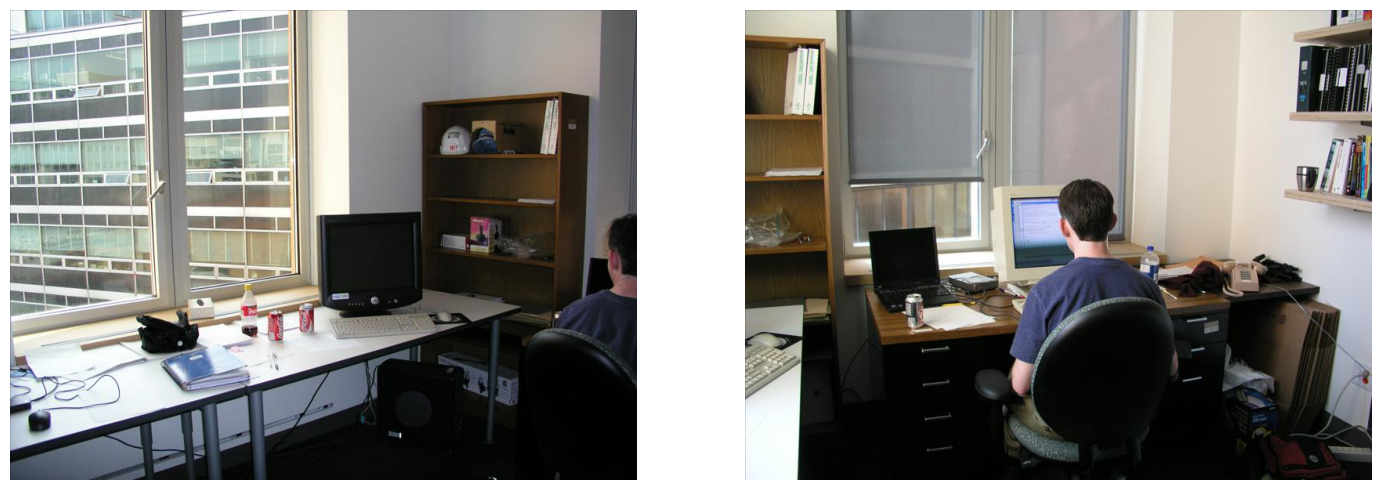

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Load images
images = [Image.open(filename) for filename in image_paths]

# Set up a grid for plotting
# Adjust nrows and ncols based on how many images you want to display
nrows = 1
ncols = len(image_paths)
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5))

# If there's only one row or one column, axs may not be a 2D array
if nrows == 1:
    axs = [axs]
if ncols == 1:
    axs = [axs]

# Display each image
for ax, img in zip(axs[0], images):  # Adjust axs[0] if you have more than one row
    ax.imshow(img)
    ax.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

### Construct GPT-4V request

In [6]:
# construct openai gpt-4v request with images
api_key = os.getenv('OPENAI_API_KEY')
user_content = []

prompt = "How many computers are there in the room in totol?"

prompt_dict = {"type": "text","text": prompt}
user_content.append(prompt_dict)

for base64_img in base64_images:
    img_dict = { "type": "image_url",
                  "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_img}"
                  }
                }
    user_content.append(img_dict)


headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": user_content
    }
  ],
  "max_tokens": 300
}

### Send request for image understanding

In [7]:
import requests

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

# print(response.json())

### Parse response

In [8]:
res_dict = response.json()
print(res_dict["choices"][0]["message"]["content"])

In the first image, there is one desktop computer visible on the desk. In the second image, there is also one visible desktop computer. Additionally, there appears to be a laptop open on the desk in the second image, making it two computers in that particular room if we count both the desktop and laptop.

Therefore, across both images, you can see a total of three computers: two desktops and one laptop.


### Optional: Image as URLS

In [11]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
            "detail": "high"
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)

The image presents a tranquil natural scene featuring a wooden boardwalk extending through a lush green meadow. The meadow is filled with tall grass and scattered shrubs, and there are trees visible in the distance. Above, there is a scenic blue sky with wispy clouds, which adds to the serene atmosphere of the landscape. The perspective of the boardwalk creates a sense of depth, inviting the viewer to imagine a walk through this peaceful outdoor setting.
